In [36]:
!pip uninstall -y scvi-tools



Found existing installation: scvi-tools 1.3.0
Uninstalling scvi-tools-1.3.0:
  Successfully uninstalled scvi-tools-1.3.0


In [38]:
!pip install scvi-tools==0.20.1


  Using cached pytorch_lightning-1.9.5-py3-none-any.whl.metadata (23 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.8.6
    Uninstalling pytorch-lightning-1.8.6:
      Successfully uninstalled pytorch-lightning-1.8.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.5 which is incompatible.
igfold 0.4.0 requires pytorch-lightning<1.9.0,>=1.5.10, b

In [41]:
import scanpy as sc
import pandas as pd
import random
import numpy as np
import matplotlib as plt
import gc 
import ctypes
import scvi
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import gc 
import ctypes
import sccoda
import pertpy as pt


ImportError: cannot import name 'REGISTRY_KEYS' from 'scvi' (/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/scvi/__init__.py)

In [2]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

2025-05-04 11:41:38.767046: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 11:41:38.782665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746348098.800021  306029 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746348098.805153  306029 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746348098.818989  306029 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
adata = sc.read_h5ad('../data/luca_query_reannotated.h5ad')

In [4]:
adata.obs

,sample,uicc_stage,ever_smoker,age,donor_id,origin,dataset,ann_fine,cell_type_predicted,doublet_status,...,IFN_TAMs,Reg_TAMs,Inflam_TAMs,LA_TAMs,Angio_TAMs,RTM_TAMs,Prolif_TAMs,Subtype,Projection_CellType,ident
001C_AAACCTGTCAACACCA-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.353933,0.571664,0.298638,0.541069,0.427279,0.565822,0.401695,Reg_TAMs,RTM_TAMs,local
001C_AAACGGGAGGCTCATT-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,singlet,...,0.477315,0.451494,0.370148,0.492239,0.537751,0.511095,0.348617,Angio_TAMs,LA_TAMs,local
001C_AAACGGGGTATAATGG-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.387389,0.497444,0.282365,0.403790,0.443018,0.548354,0.328568,RTM_TAMs,RTM_TAMs,local
001C_AAACGGGTCACAAACC-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,singlet,...,0.333177,0.592321,0.262999,0.594631,0.444907,0.450925,0.406192,LA_TAMs,LA_TAMs,local
001C_AAAGATGAGTGCTGCC-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.358754,0.648105,0.282604,0.482257,0.408499,0.454457,0.291259,Reg_TAMs,RTM_TAMs,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTGTCTA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.551482,0.640531,0.489101,0.623875,0.525708,0.514441,0.527691,Reg_TAMs,IFN_TAMs,local
TTTGTCAAGGATATAC-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.492014,0.699073,0.539889,0.612688,0.608443,0.551273,0.460248,Reg_TAMs,Reg_TAMs,local
TTTGTCAAGTACGCGA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.470449,0.588994,0.611164,0.427515,0.471975,0.431026,0.455491,Inflam_TAMs,Inflam_TAMs,local
TTTGTCACATCTATGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.515349,0.589936,0.633147,0.577088,0.550079,0.487074,0.425062,Inflam_TAMs,LA_TAMs,local


In [5]:
adata.obs.groupby("Projection_CellType").size()

Projection_CellType
Angio_TAMs      5741
IFN_TAMs       12215
Inflam_TAMs     6484
Int.Node.3      4221
Int.Node.4       922
Int.Node.5       150
LA_TAMs        32428
Prolif_TAMs     3771
RTM_TAMs       94074
Reg_TAMs       17933
dtype: int64

In [6]:
df = adata.obs[['sample', 'Projection_CellType']]

cell_counts = df.groupby(['sample', 'Projection_CellType']).size().reset_index(name='count')

count_matrix = cell_counts.pivot(index='sample', columns='Projection_CellType', values='count').fillna(0)

count_matrix = count_matrix.drop(columns=['Int.Node.3', 'Int.Node.4', 'Int.Node.5'])

print(count_matrix)

row_sums = count_matrix.sum(axis=1)

rows_below_50 = count_matrix.index[row_sums < 50]

df_cleaned = count_matrix.drop(index=rows_below_50)

print(df_cleaned)


Projection_CellType         Angio_TAMs  IFN_TAMs  Inflam_TAMs  LA_TAMs  \
sample                                                                   
Adams_Kaminski_2020_001C             5        10            3       81   
Adams_Kaminski_2020_002C             2         3            5      185   
Adams_Kaminski_2020_003C            10        51            4      283   
Adams_Kaminski_2020_8CO              0         0            0        0   
Adams_Kaminski_2020_022C-a           8        87            7      213   
...                                ...       ...          ...      ...   
Zilionis_Klein_2019_p5t2             8        10            5       97   
Zilionis_Klein_2019_p6t1            10         2            5       82   
Zilionis_Klein_2019_p6t2            13         3            2       72   
Zilionis_Klein_2019_p7t1            24         9            3      212   
Zilionis_Klein_2019_p7t2            30        13            3      301   

Projection_CellType         Prolif_TA

In [7]:
df_cleaned['sample'] = df_cleaned.index

#sample_stage[df_cleaned.index]

In [8]:
df_cleaned

Projection_CellType,Angio_TAMs,IFN_TAMs,Inflam_TAMs,LA_TAMs,Prolif_TAMs,RTM_TAMs,Reg_TAMs,sample
sample,,,,,,,,
Adams_Kaminski_2020_001C,5,10,3,81,9,439,32,Adams_Kaminski_2020_001C
Adams_Kaminski_2020_002C,2,3,5,185,3,105,30,Adams_Kaminski_2020_002C
Adams_Kaminski_2020_003C,10,51,4,283,15,920,116,Adams_Kaminski_2020_003C
Adams_Kaminski_2020_022C-a,8,87,7,213,9,857,85,Adams_Kaminski_2020_022C-a
Adams_Kaminski_2020_022C-b,9,77,6,203,5,730,79,Adams_Kaminski_2020_022C-b
...,...,...,...,...,...,...,...,...
Zilionis_Klein_2019_p5t2,8,10,5,97,10,1,31,Zilionis_Klein_2019_p5t2
Zilionis_Klein_2019_p6t1,10,2,5,82,1,12,67,Zilionis_Klein_2019_p6t1
Zilionis_Klein_2019_p6t2,13,3,2,72,3,7,52,Zilionis_Klein_2019_p6t2


In [10]:
data_all = dat.from_pandas(df_cleaned, covariate_columns=["sample"])


In [11]:
data_all.obs.index.name = None
data_all.obs

Projection_CellType,sample
Adams_Kaminski_2020_001C,Adams_Kaminski_2020_001C
Adams_Kaminski_2020_002C,Adams_Kaminski_2020_002C
Adams_Kaminski_2020_003C,Adams_Kaminski_2020_003C
Adams_Kaminski_2020_022C-a,Adams_Kaminski_2020_022C-a
Adams_Kaminski_2020_022C-b,Adams_Kaminski_2020_022C-b
...,...
Zilionis_Klein_2019_p5t2,Zilionis_Klein_2019_p5t2
Zilionis_Klein_2019_p6t1,Zilionis_Klein_2019_p6t1
Zilionis_Klein_2019_p6t2,Zilionis_Klein_2019_p6t2
Zilionis_Klein_2019_p7t1,Zilionis_Klein_2019_p7t1


In [ ]:
# 1. Build a mapping from sample to tumor_stage
sample_to_stage = adata.obs[['sample', 'tumor_stage']].drop_duplicates().set_index('sample')['tumor_stage']

# 2. Apply the mapping to data_all.obs
data_all.obs['tumor_stage'] = data_all.obs['sample'].map(sample_to_stage)

data_all.obs

Projection_CellType,sample,tumor_stage
Adams_Kaminski_2020_001C,Adams_Kaminski_2020_001C,non-cancer
Adams_Kaminski_2020_002C,Adams_Kaminski_2020_002C,non-cancer
Adams_Kaminski_2020_003C,Adams_Kaminski_2020_003C,non-cancer
Adams_Kaminski_2020_022C-a,Adams_Kaminski_2020_022C-a,non-cancer
Adams_Kaminski_2020_022C-b,Adams_Kaminski_2020_022C-b,non-cancer
...,...,...
Zilionis_Klein_2019_p5t2,Zilionis_Klein_2019_p5t2,advanced
Zilionis_Klein_2019_p6t1,Zilionis_Klein_2019_p6t1,early
Zilionis_Klein_2019_p6t2,Zilionis_Klein_2019_p6t2,early
Zilionis_Klein_2019_p7t1,Zilionis_Klein_2019_p7t1,advanced


In [13]:
data_all.obs['tumor_stage'].value_counts()

tumor_stage
early         147
non-cancer     79
advanced       76
Name: count, dtype: int64

In [14]:
data_cancer = data_all[data_all.obs["tumor_stage"].isin(["early", "advanced"])]
print(data_cancer.obs)

Projection_CellType                         sample tumor_stage
Chen_Zhang_2020_NSCLC-2    Chen_Zhang_2020_NSCLC-2       early
Chen_Zhang_2020_NSCLC-5    Chen_Zhang_2020_NSCLC-5    advanced
Chen_Zhang_2020_NSCLC-6    Chen_Zhang_2020_NSCLC-6       early
Chen_Zhang_2020_NSCLC-7    Chen_Zhang_2020_NSCLC-7       early
Chen_Zhang_2020_NSCLC-8    Chen_Zhang_2020_NSCLC-8    advanced
...                                            ...         ...
Zilionis_Klein_2019_p5t2  Zilionis_Klein_2019_p5t2    advanced
Zilionis_Klein_2019_p6t1  Zilionis_Klein_2019_p6t1       early
Zilionis_Klein_2019_p6t2  Zilionis_Klein_2019_p6t2       early
Zilionis_Klein_2019_p7t1  Zilionis_Klein_2019_p7t1    advanced
Zilionis_Klein_2019_p7t2  Zilionis_Klein_2019_p7t2    advanced

[223 rows x 2 columns]


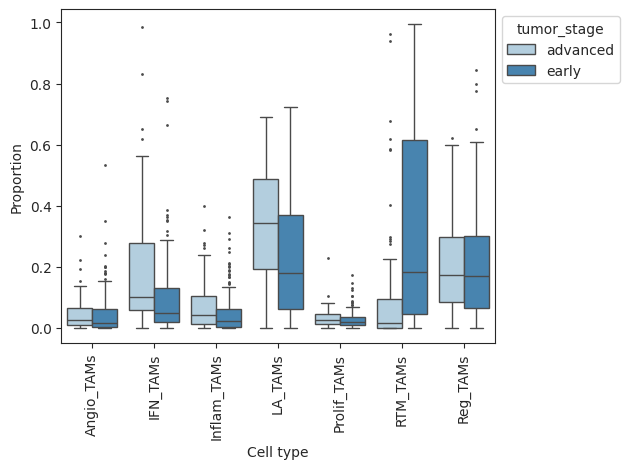

In [15]:
import matplotlib.pyplot as plt

# Generate the plot
viz.boxplots(data_cancer, feature_name="tumor_stage")

# Save as PDF in the 'figures/' folder
plt.savefig("../figures/tumor_stage_boxplot_sccoda.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


In [26]:
path = "../data/sccoda.hmc.results.pkl"
# loading
with open(path, "rb") as f:
    sim_results_2 = pkl.load(f)

sim_results_2.summary()


Compositional Analysis summary:

Data: 223 samples, 7 cell types
Reference index: 4
Formula: tumor_stage

Intercepts:
             Final Parameter  Expected Sample
Cell Type                                    
Angio_TAMs            -1.002        36.510538
IFN_TAMs              -0.160        84.741117
Inflam_TAMs           -0.752        46.880458
LA_TAMs                0.479       160.549278
Prolif_TAMs           -0.938        38.923607
RTM_TAMs              -1.037        35.254773
Reg_TAMs               0.008       100.243369


Effects:
                                  Final Parameter  Expected Sample  \
Covariate            Cell Type                                       
tumor_stage[T.early] Angio_TAMs         -0.206787        33.628030   
                     IFN_TAMs           -0.434184        62.175612   
                     Inflam_TAMs        -0.317807        38.641990   
                     LA_TAMs            -0.540728       105.891872   
                     Prolif_TAMs     

In [27]:
sim_results_2.plot_stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="tumor_stage", figsize=(4, 2)
)
plt.show()

AttributeError: 'CAResult' object has no attribute 'plot_stacked_barplot'

In [28]:
adata.obs

,sample,uicc_stage,ever_smoker,age,donor_id,origin,dataset,ann_fine,cell_type_predicted,doublet_status,...,IFN_TAMs,Reg_TAMs,Inflam_TAMs,LA_TAMs,Angio_TAMs,RTM_TAMs,Prolif_TAMs,Subtype,Projection_CellType,ident
001C_AAACCTGTCAACACCA-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.353933,0.571664,0.298638,0.541069,0.427279,0.565822,0.401695,Reg_TAMs,RTM_TAMs,local
001C_AAACGGGAGGCTCATT-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,singlet,...,0.477315,0.451494,0.370148,0.492239,0.537751,0.511095,0.348617,Angio_TAMs,LA_TAMs,local
001C_AAACGGGGTATAATGG-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.387389,0.497444,0.282365,0.403790,0.443018,0.548354,0.328568,RTM_TAMs,RTM_TAMs,local
001C_AAACGGGTCACAAACC-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,singlet,...,0.333177,0.592321,0.262999,0.594631,0.444907,0.450925,0.406192,LA_TAMs,LA_TAMs,local
001C_AAAGATGAGTGCTGCC-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.358754,0.648105,0.282604,0.482257,0.408499,0.454457,0.291259,Reg_TAMs,RTM_TAMs,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTGTCTA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.551482,0.640531,0.489101,0.623875,0.525708,0.514441,0.527691,Reg_TAMs,IFN_TAMs,local
TTTGTCAAGGATATAC-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.492014,0.699073,0.539889,0.612688,0.608443,0.551273,0.460248,Reg_TAMs,Reg_TAMs,local
TTTGTCAAGTACGCGA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.470449,0.588994,0.611164,0.427515,0.471975,0.431026,0.455491,Inflam_TAMs,Inflam_TAMs,local
TTTGTCACATCTATGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.515349,0.589936,0.633147,0.577088,0.550079,0.487074,0.425062,Inflam_TAMs,LA_TAMs,local


In [29]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="Projection_CellType",
    generate_sample_level=True,
    cell_type_identifier="Projection_CellType",
    sample_identifier="sample",
    covariate_obs=["tumor_stage"],
)
sccoda_data

NameError: name 'pt' is not defined